# Lab №2

## Execution

### Import necessary libraries

In [1]:
from math import pi
import numpy as np
import roboticstoolbox as rtb
import matplotlib.pyplot as plt
import spatialmath.base as sb

### Import the Stanford arm model

In [2]:
robot = rtb.models.DH.Stanford()
print(robot)

DHRobot: Stanford arm (by Victor Scheinman), 6 joints (RRPRRR), dynamics, standard DH parameters
┌────────┬───────┬────────┬────────┬─────────────────────┬────────┐
│   θⱼ   │  dⱼ   │   aⱼ   │   ⍺ⱼ   │         q⁻          │   q⁺   │
├────────┼───────┼────────┼────────┼─────────────────────┼────────┤
│  q1    │ 0.412 │      0 │ -90.0° │             -170.0° │ 170.0° │
│  q2    │ 0.154 │      0 │  90.0° │             -170.0° │ 170.0° │
│ -90.0° │    q3 │ 0.0203 │   0.0° │ 0.30479999999999996 │   1.27 │
│  q4    │     0 │      0 │ -90.0° │             -170.0° │ 170.0° │
│  q5    │     0 │      0 │  90.0° │              -90.0° │  90.0° │
│  q6    │     0 │      0 │   0.0° │             -170.0° │ 170.0° │
└────────┴───────┴────────┴────────┴─────────────────────┴────────┘

┌──┬──┐
└──┴──┘

┌──────┬─────┬─────┬────┬─────┬─────┬─────┐
│ name │ q0  │ q1  │ q2 │ q3  │ q4  │ q5  │
├──────┼─────┼─────┼────┼─────┼─────┼─────┤
│   qr │  0° │  0° │  0 │  0° │  0° │  0° │
│   qz │  0° │  0° │  0 │  0°

In [ ]:
# Print link masses
print(robot.links[0].m)  
print(robot.links[1].m)
print(robot.links[2].m)  
print(robot.links[3].m) 
print(robot.links[4].m)  
print(robot.links[5].m)  

9.29
5.01
4.25
1.08
0.63
0.51


### Set the initial position of the robot and plot it


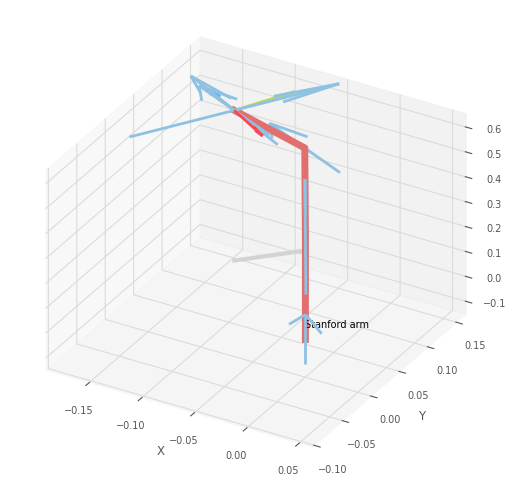

<Figure size 640x480 with 0 Axes>

In [4]:
q_start = [0.5, -0.3, 0.2, 0.4, -0.2, 0.1]
robot.plot(q_start)
plt.show()

Solve the forward kinematics problem

In [5]:
T_start = robot.fkine(q_start)
print(T_start)

   0.7562    0.5126   -0.4068   -0.116     
  -0.5661    0.8242   -0.0137    0.089     
   0.3282    0.2406    0.9134    0.6031    
   0         0         0         1         



### Plot the manipulator's workspace
Initialize variables

In [ ]:
n = 20  # Number of points per axis
i = 0  # Counter
move = [np.linspace(robot.links[i].qlim[0], robot.links[i].qlim[1], n) for i in range(3)]  # Movement limits for first three joints
pose = np.zeros([3,n**3])  # Array to store positions

Calculate workplace points

In [ ]:
# Iterate through all possible joint combinations
for q1 in move[0]:
    for q2 in move[1]:
        for q3 in move[2]:
            Tt = robot.fkine([q1,q2,q3,0,0,0])  # Forward kinematics calculation
            for j in range(3):
                pose[j][i] = Tt.t[j]  # Store position
            i += 1

Building a work area

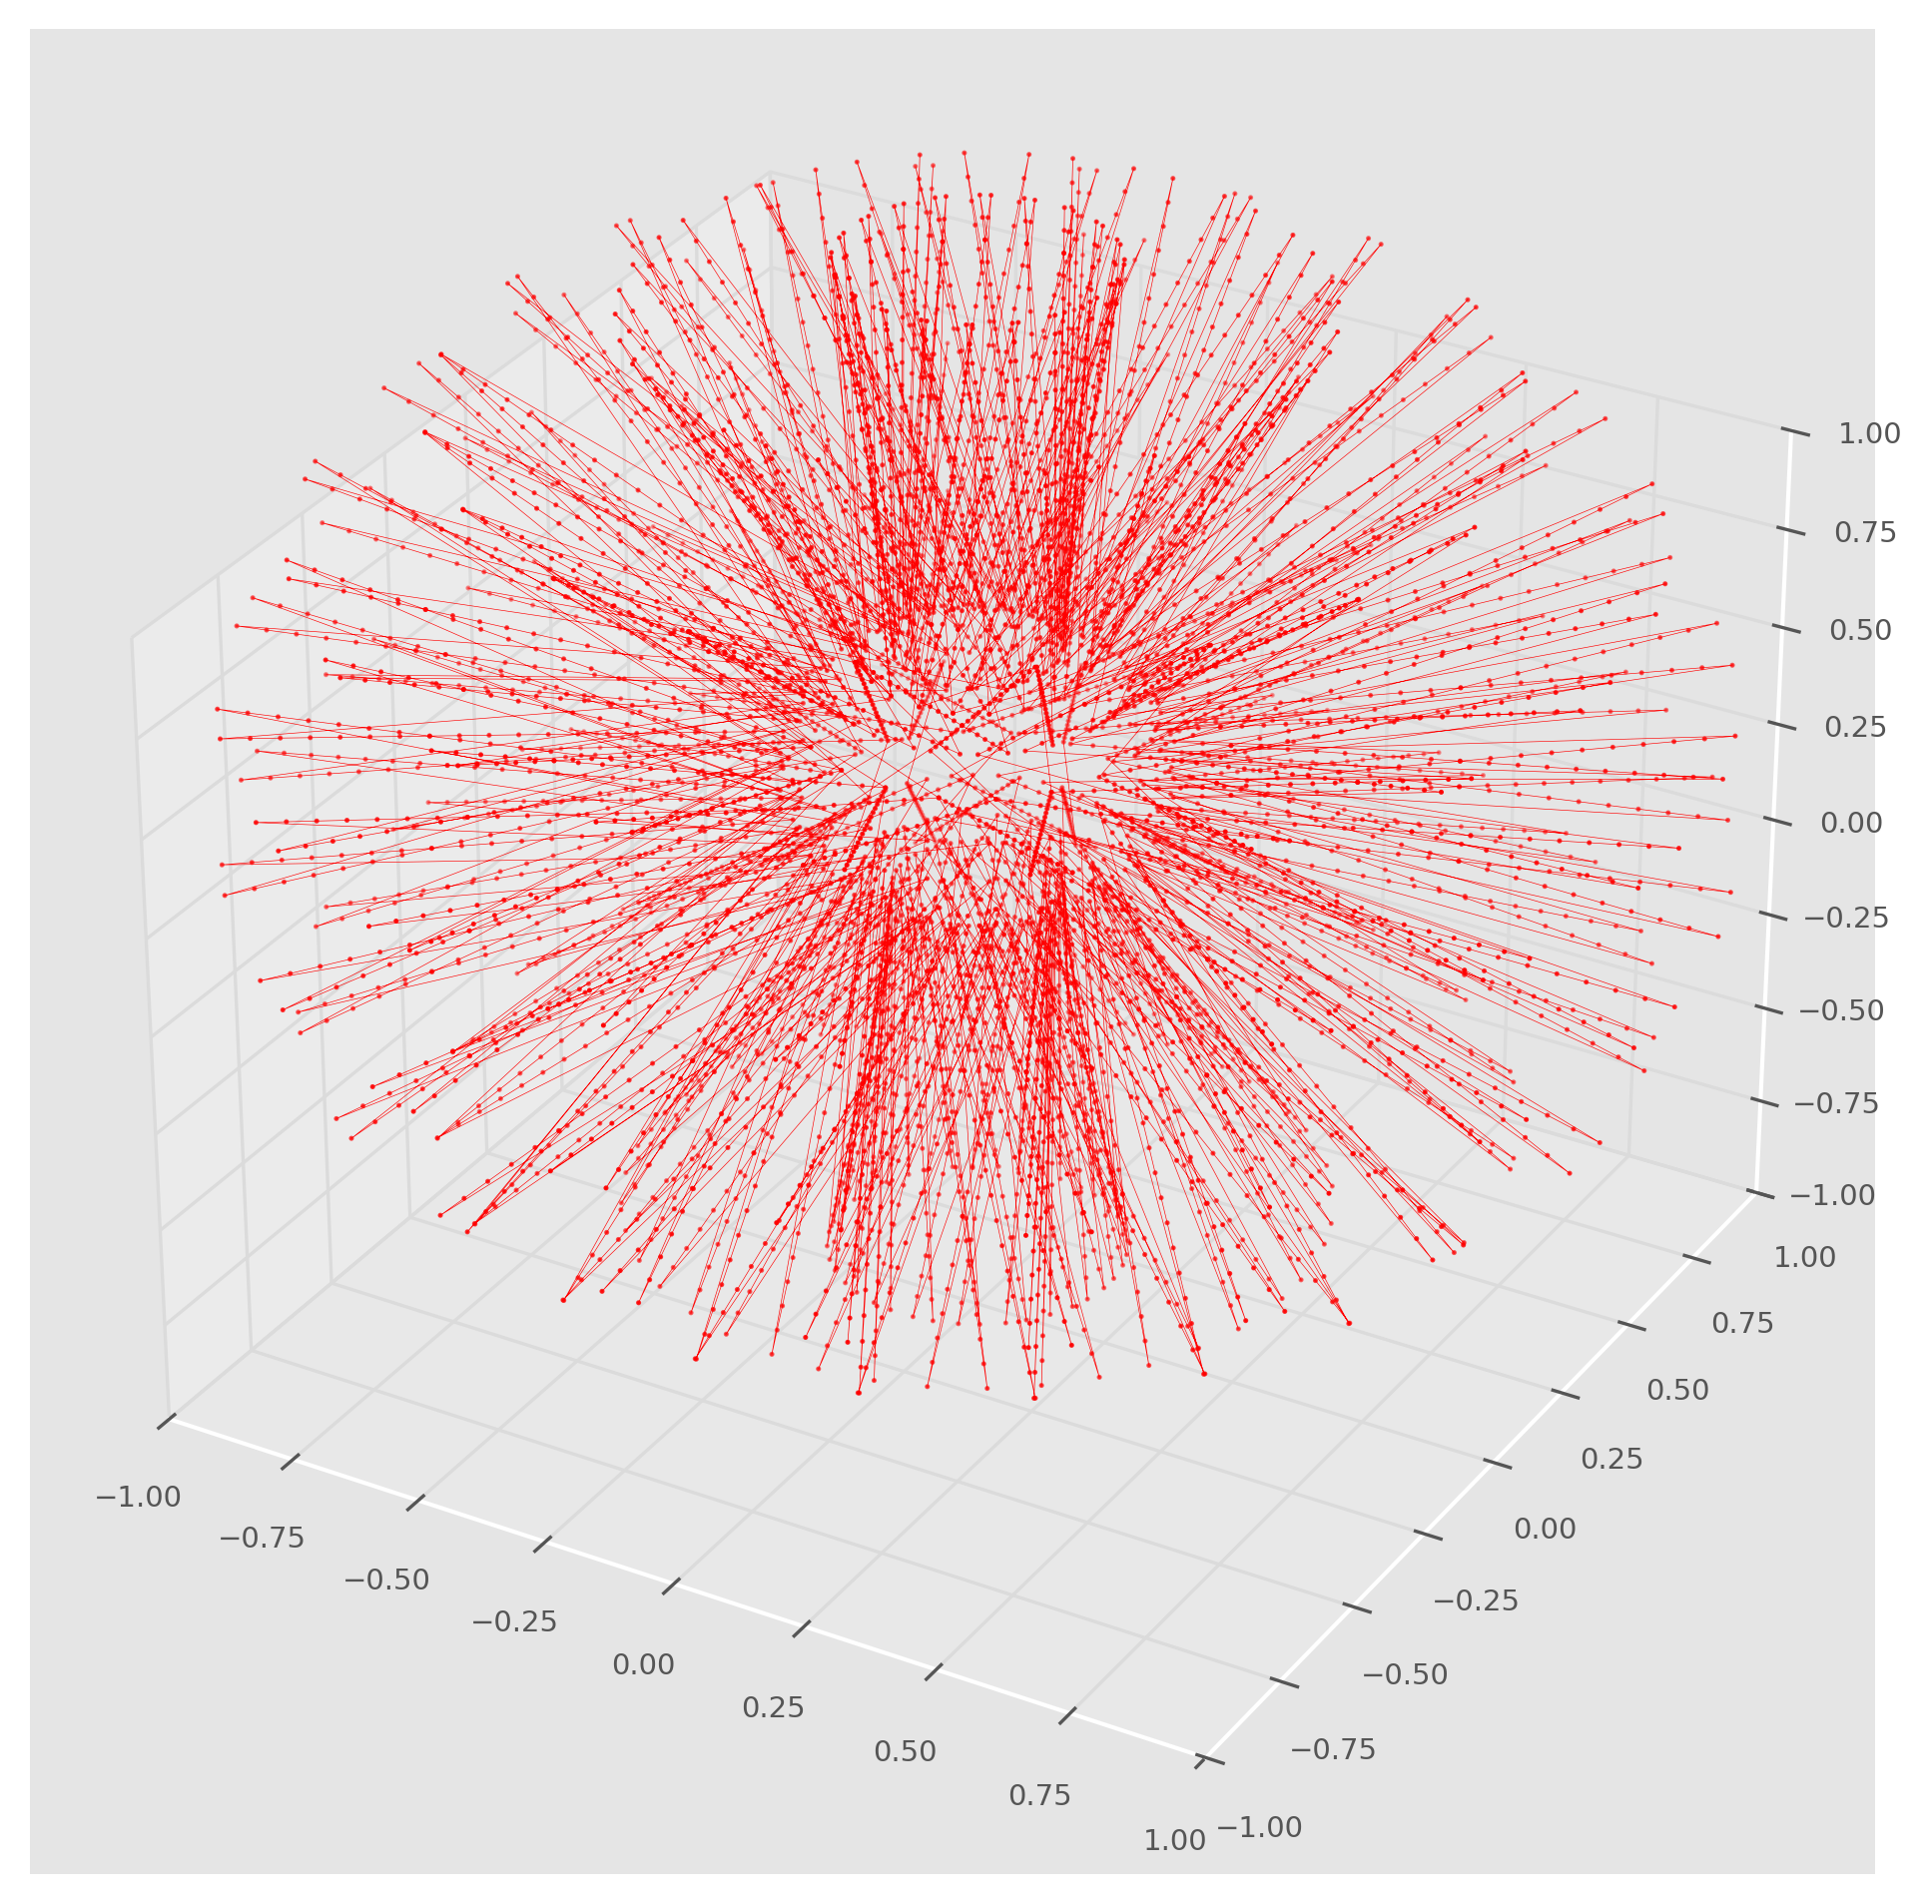

In [ ]:
# Plot the workspace of the robot's end-effector based on the sampled configurations
plt.figure(figsize=(8,8), dpi=300)
ax = plt.axes(projection="3d")
# Draw the trajectory and scatter plot of the reachable points
ax.plot3D(pose[0], pose[1], pose[2], color='red', linewidth=0.15)
ax.scatter3D(pose[0], pose[1], pose[2], s=0.5, color='red')
# Set plot limits for each axis
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
plt.show()

### Select the endpoint and check it (solve the inverse kinematics problem)

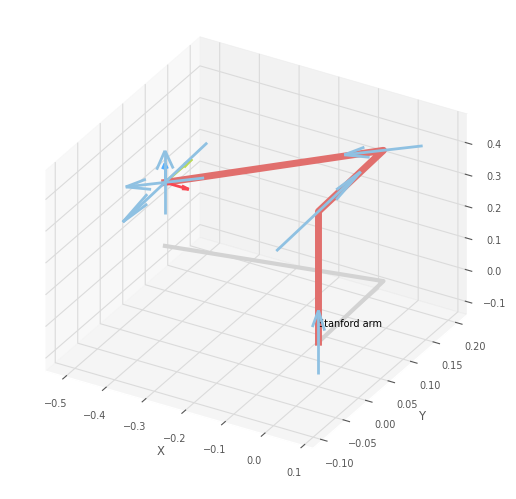

<Figure size 640x480 with 0 Axes>

In [ ]:
# Define a desired end-effector position in 3D space
point = [-0.5, 0.1, 0.2]

# Convert the point to a homogeneous transformation matrix
T_end = sb.transl(point)

# Solve the inverse kinematics using the Gauss-Newton method to find joint angles
q_end = robot.ikine_GN(T_end).q  # Other IK methods can also be used

# Plot the robot at the computed final configuration
robot.plot(q_end)
plt.show()


### Plan the trajectory

Let's plan the trajectory using the 'jtraj' method for $N$ = 100 points

In [ ]:
# Define the time parameters for trajectory generation
N = 100  # number of trajectory steps
t_start = 0
t_stop = 5
t_shag = t_stop / N  # step size

# Create a time array for trajectory
time = np.arange(t_start, t_stop, t_shag)

# Plan a joint-space trajectory between initial and final configurations using joint interpolation
tr_jtraj = rtb.jtraj(q_start, q_end, time)


Let's plan the same trajectory using the 'mtraj' method with the 'trapezoidal' function

In [11]:
tr_trap = rtb.mtraj(rtb.trapezoidal, q_start, q_end, time)

Let's plan the same trajectory using the 'mtraj' method with the 'quintic' function

In [12]:
tr_quin = rtb.mtraj(rtb.quintic, q_start, q_end, time)

### Let's build graphs

Let's plot the position graphs for each link

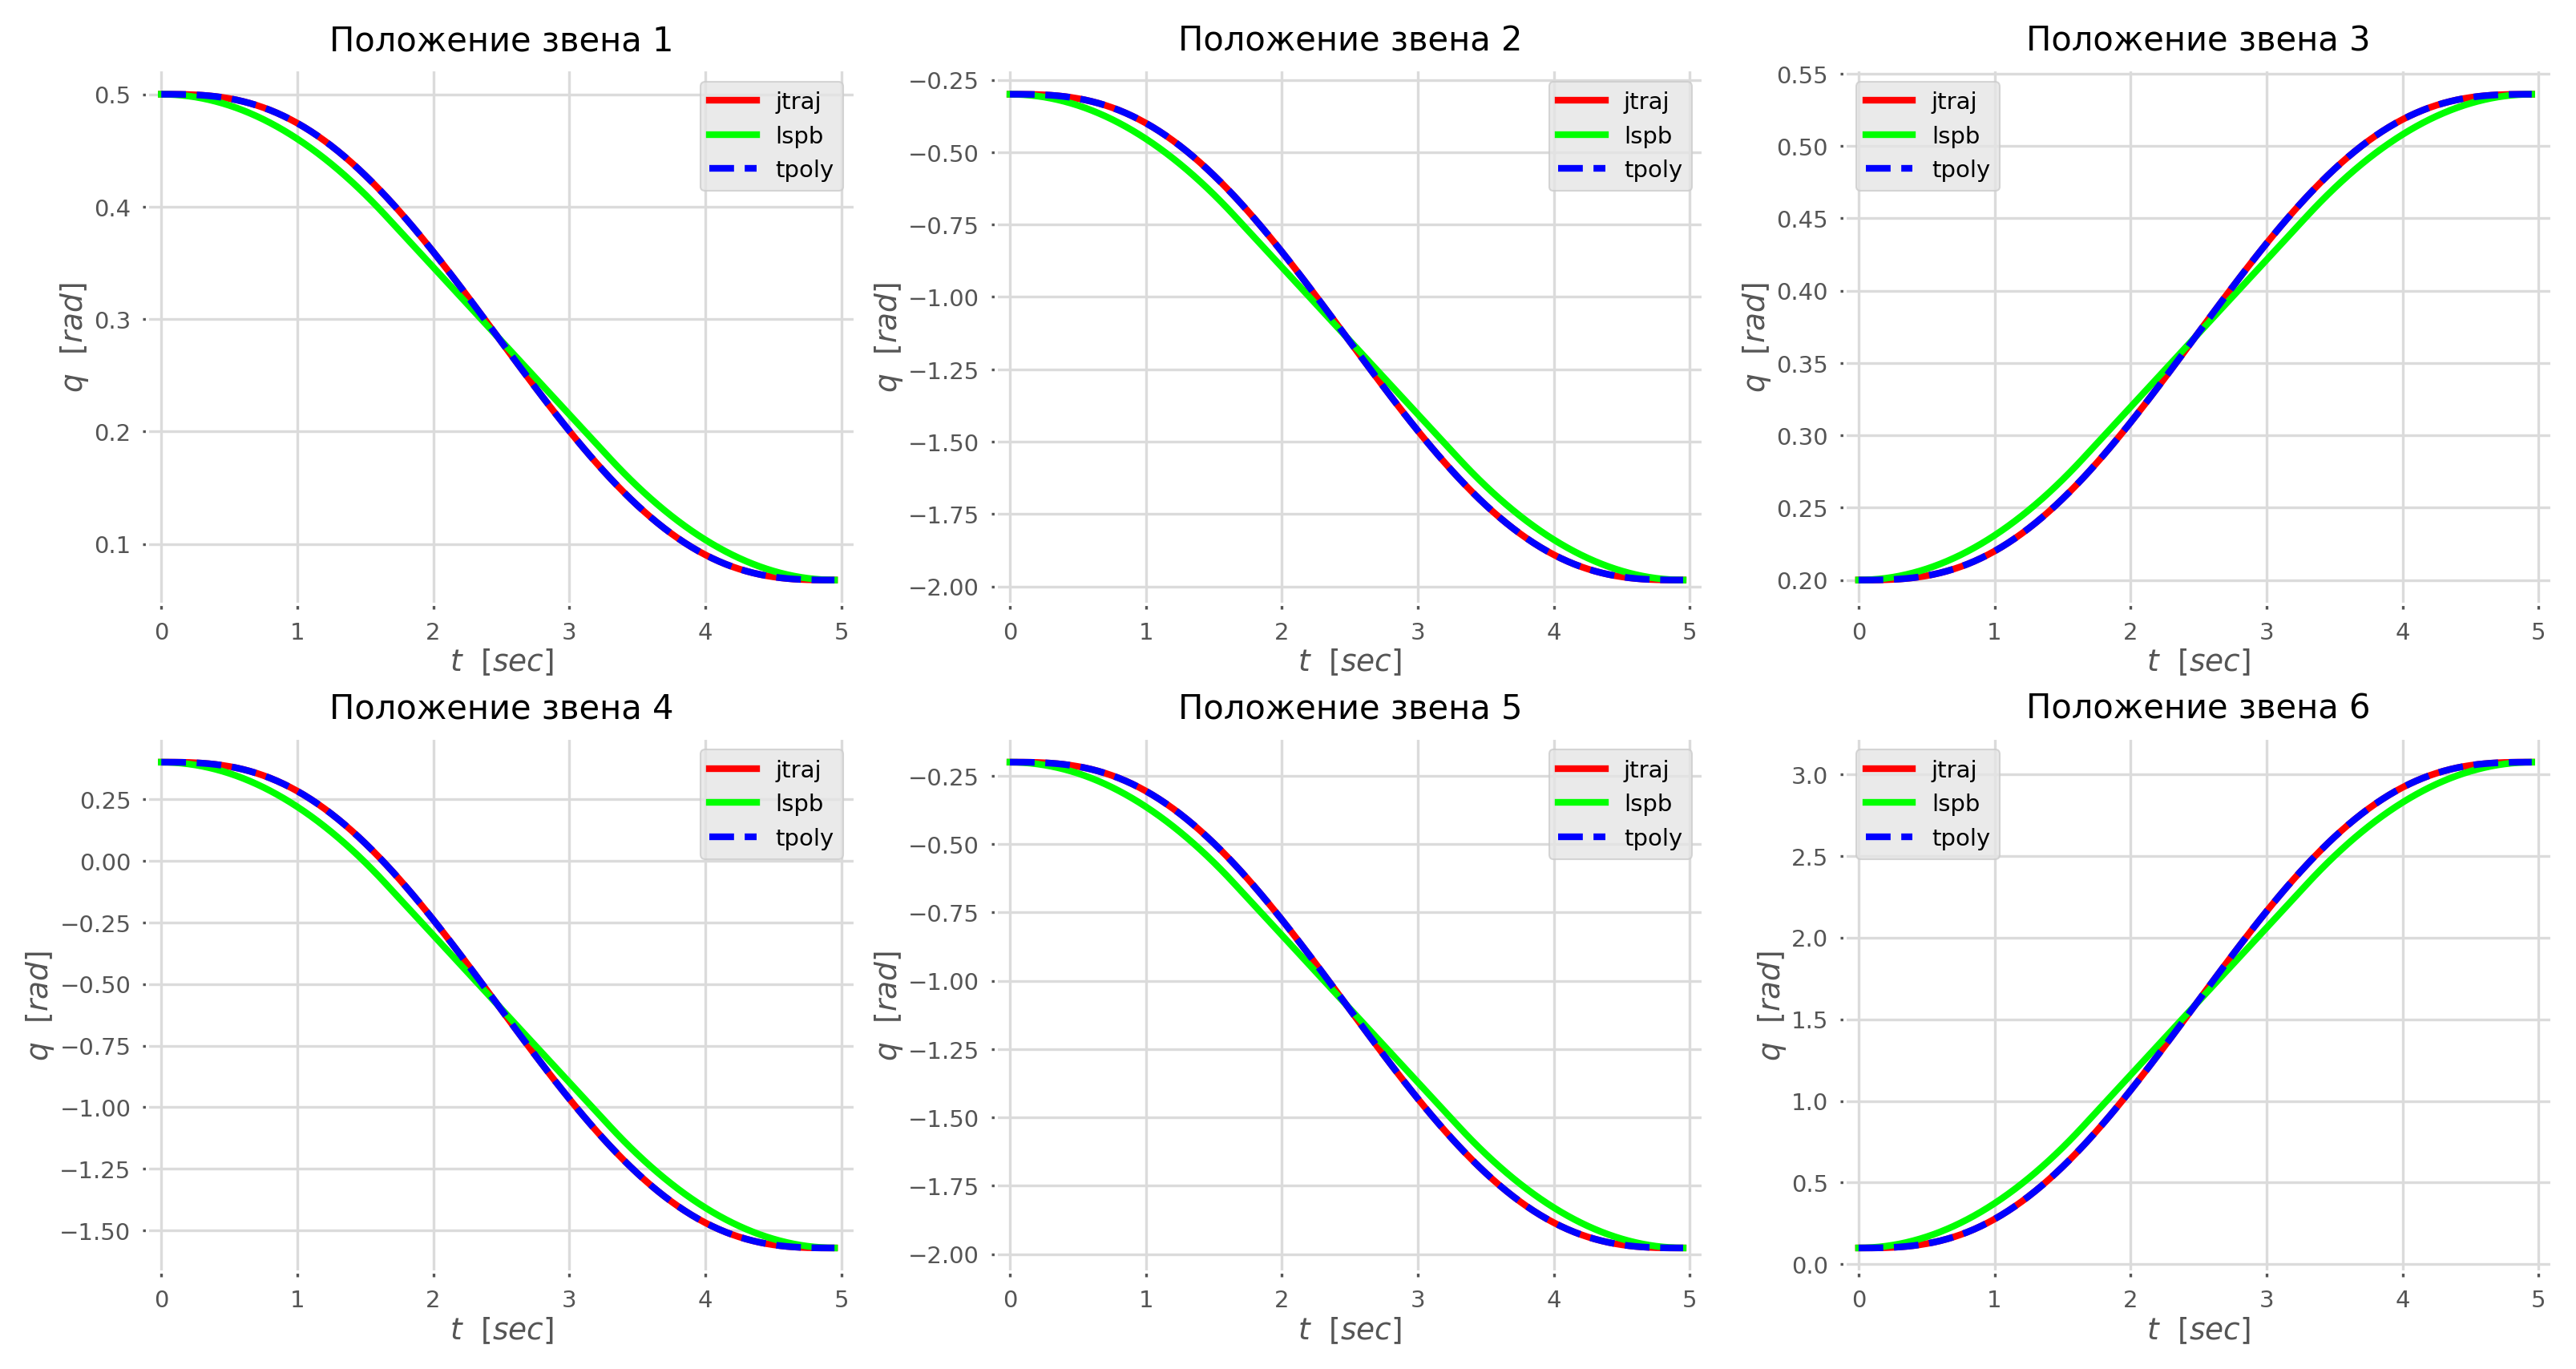

In [ ]:
plt.figure(figsize=(10,5), dpi=300)  # Set canvas size and point density (graph resolution)
for g in range(1,7):
    plt.subplot(2,3,g)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0.25)  # Set spacing between subplots to prevent overlap
    
    # Extract joint position data
    joint_position_jtraj = [tr_jtraj.q[i][g-1] for i in range(len(tr_jtraj.q))]
    joint_position_trap = [tr_trap.q[i][g-1] for i in range(len(tr_trap.q))]
    joint_position_quin = [tr_quin.q[i][g-1] for i in range(len(tr_quin.q))]
    
    # Plot trajectories
    plt.plot(time, joint_position_jtraj, linestyle='-', linewidth=2, color=(1,0,0), label=r"jtraj")
    plt.plot(time, joint_position_trap, linestyle='-', linewidth=2, color=(0,1,0), label=r"trapezoidal")
    plt.plot(time, joint_position_quin, linestyle='--', linewidth=2, color=(0,0,1), label=r"quintic")
    
    # Configure plot
    plt.title(f"Joint {g} Position", fontsize=10)
    plt.ylabel(r"$q$  [$rad$]", fontsize=9)
    plt.xlabel(r"Time  [$s$]", fontsize=9)
    plt.grid(True)
    plt.legend()  # Show legend (displays label text)
    
    # Format axes
    ax = plt.gca()  # gca = get current axis
    ax.set_facecolor((1,1,1))  # Set plot background color
    ax.set_xlim([t_start-0.1, t_stop+0.1])  # X-axis limits

plt.show()

Plot velocity graphs for each joint

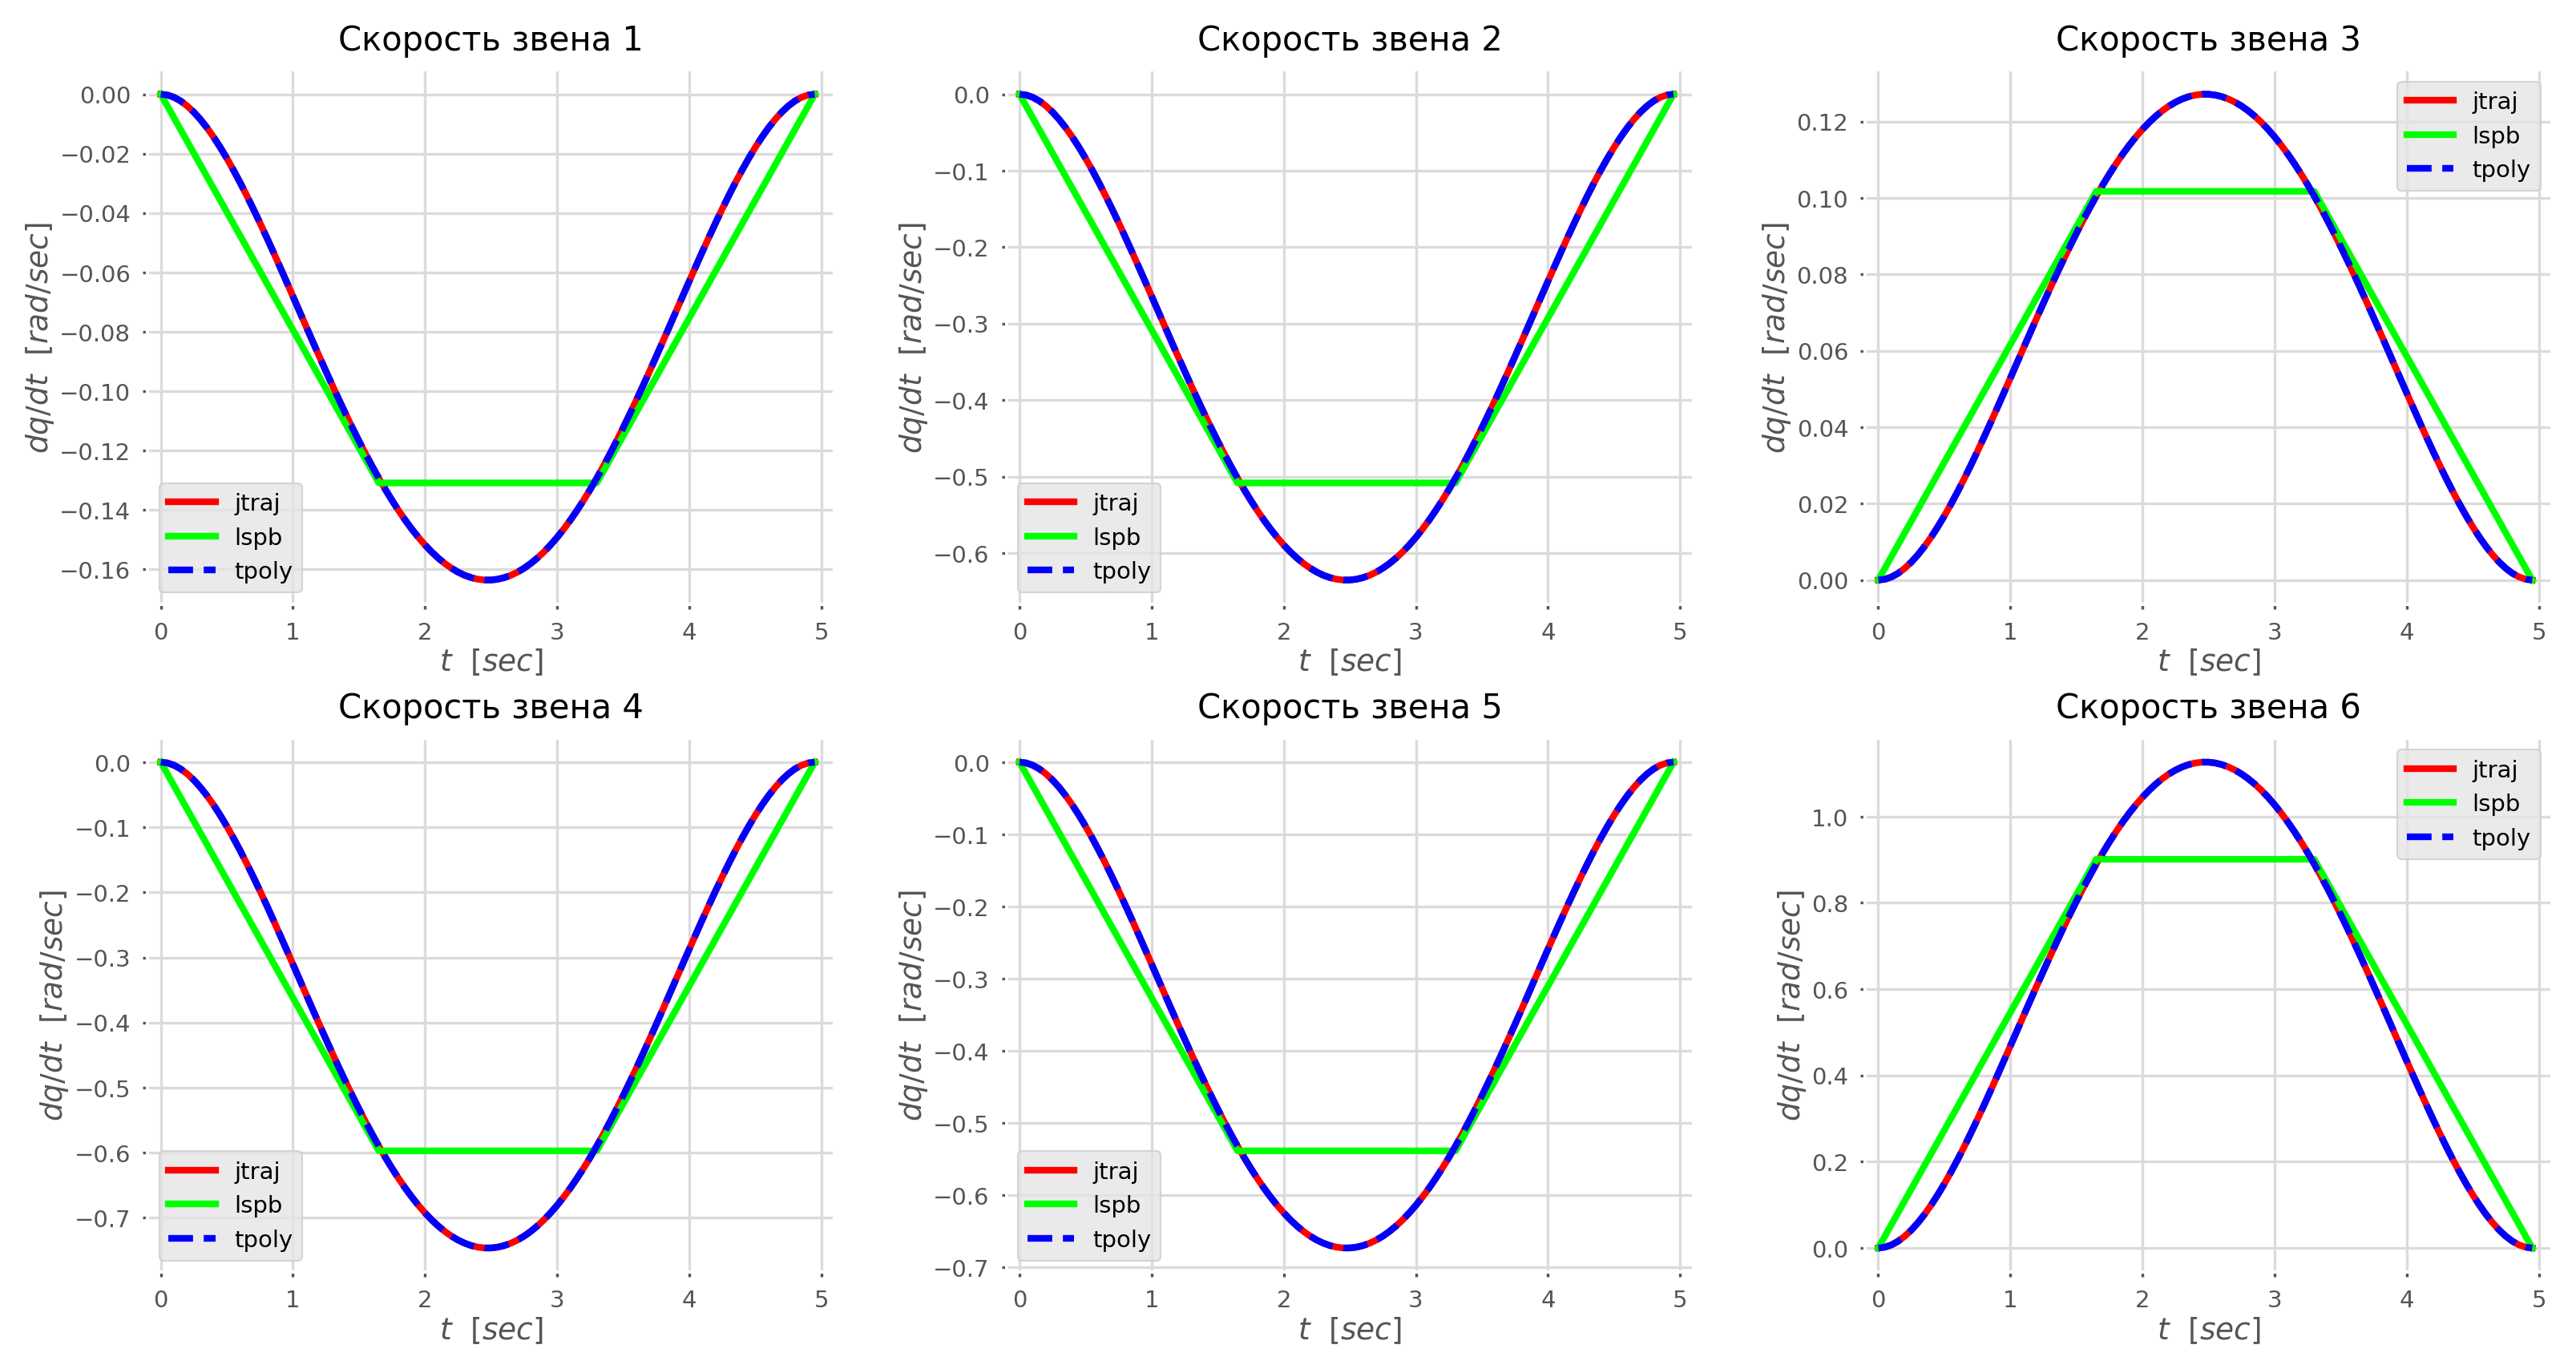

In [ ]:
plt.figure(figsize=(10,5), dpi=300)  # Set canvas size and resolution for clarity
for g in range(1,7):
    plt.subplot(2,3,g)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, 
                      wspace=0.25, hspace=0.25)  # Adjust spacing between subplots
    
    # Extract velocity data for each trajectory type
    traektoriya_jtraj = [tr_jtraj.qd[i][g-1] for i in range(len(tr_jtraj.qd))]
    traektoriya_trap = [tr_trap.qd[i][g-1] for i in range(len(tr_trap.qd))]
    traektoriya_quin = [tr_quin.qd[i][g-1] for i in range(len(tr_quin.qd))]
    
    # Plot trajectories with different styles
    plt.plot(time, traektoriya_jtraj, linestyle='-', linewidth=2, 
            color=(1,0,0), label=r"jtraj")
    plt.plot(time, traektoriya_trap, linestyle='-', linewidth=2,
            color=(0,1,0), label=r"trapezoidal")
    plt.plot(time, traektoriya_quin, linestyle='--', linewidth=2,
            color=(0,0,1), label=r"quintic")
    
    # Configure plot appearance
    plt.title(f"Joint {g} Velocity", fontsize=10)
    plt.ylabel(r"$dq/dt$  [$rad/s$]", fontsize=9)
    plt.xlabel(r"Time  [$s$]", fontsize=9)
    plt.grid(True)
    plt.legend()
    
    # Format axes
    ax = plt.gca()
    ax.set_facecolor((1,1,1))  # Set white background
    ax.set_xlim([t_start-0.1, t_stop+0.1])  # Set X-axis limits with padding

plt.show()

Let's plot acceleration graphs for each link

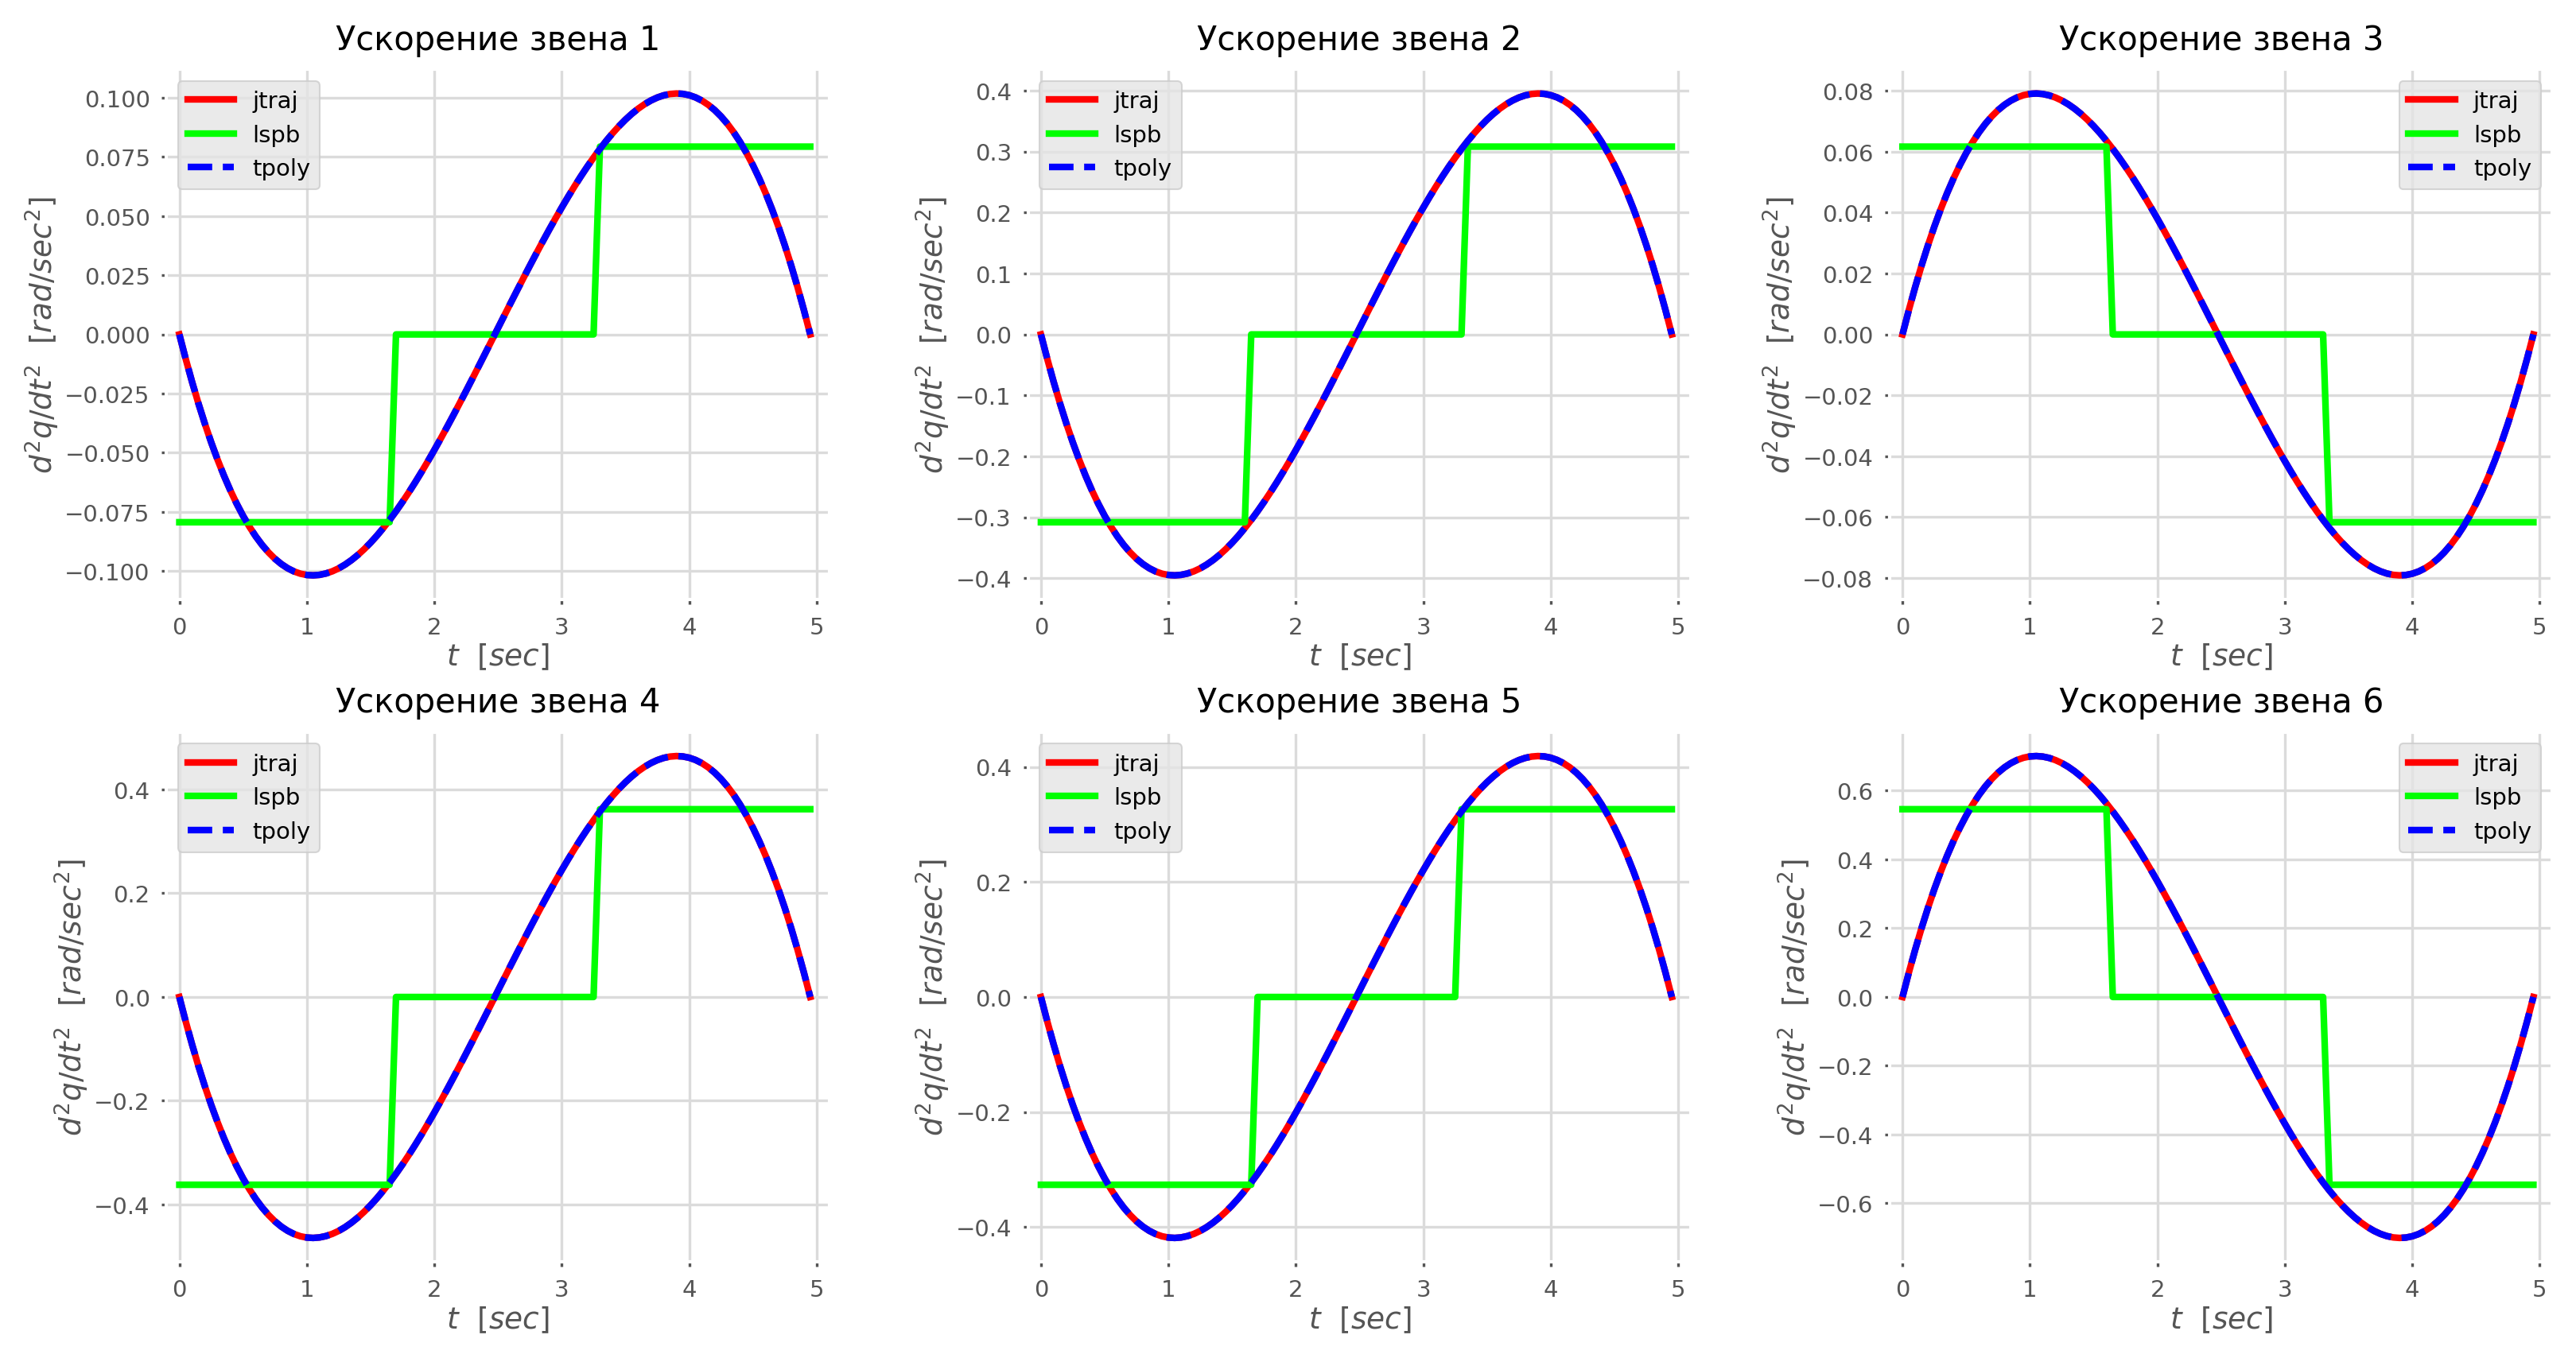

In [ ]:
# Create figure with specified dimensions and resolution
fig = plt.figure(figsize=(10,5), dpi=300)

# Create 6 subplots (2 rows x 3 columns)
for g in range(1,7):
    plt.subplot(2,3,g)
    
    # Adjust subplot spacing to prevent overlap
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, 
                      wspace=0.3, hspace=0.25)
    
    # Extract acceleration data for different trajectory methods
    traektoriya_jtraj = [tr_jtraj.qdd[i][g-1] for i in range(len(tr_jtraj.qdd))]
    traektoriya_trap = [tr_trap.qdd[i][g-1] for i in range(len(tr_trap.qdd))]
    traektoriya_quin = [tr_quin.qdd[i][g-1] for i in range(len(tr_quin.qdd))]
    
    # Plot trajectory comparison
    plt.plot(time, traektoriya_jtraj, linestyle='-', linewidth=2, 
            color=(1,0,0), label=r"jtraj")
    plt.plot(time, traektoriya_trap, linestyle='-', linewidth=2,
            color=(0,1,0), label=r"lspb")
    plt.plot(time, traektoriya_quin, linestyle='--', linewidth=2,
            color=(0,0,1), label=r"tpoly")
    
    # Configure plot labels and formatting
    plt.title(r"Joint {} Acceleration".format(g), fontsize=10)
    plt.ylabel(r"${d^2}q/d{t^2}$  [$rad/s^2$]", fontsize=9)
    plt.xlabel(r"$t$  [$s$]", fontsize=9)
    plt.grid(True)
    plt.legend()
    
    # Format axes
    ax = plt.gca()
    ax.set_facecolor((1,1,1))  # White background
    ax.set_xlim([t_start-0.1,t_stop+0.1])  # X-axis limits with buffer

plt.show()